<a href="https://www.kaggle.com/code/shinnurathod/02-task-nlp-hate-speech-rec?scriptVersionId=210094185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Here is Hate Speech Recongnition application

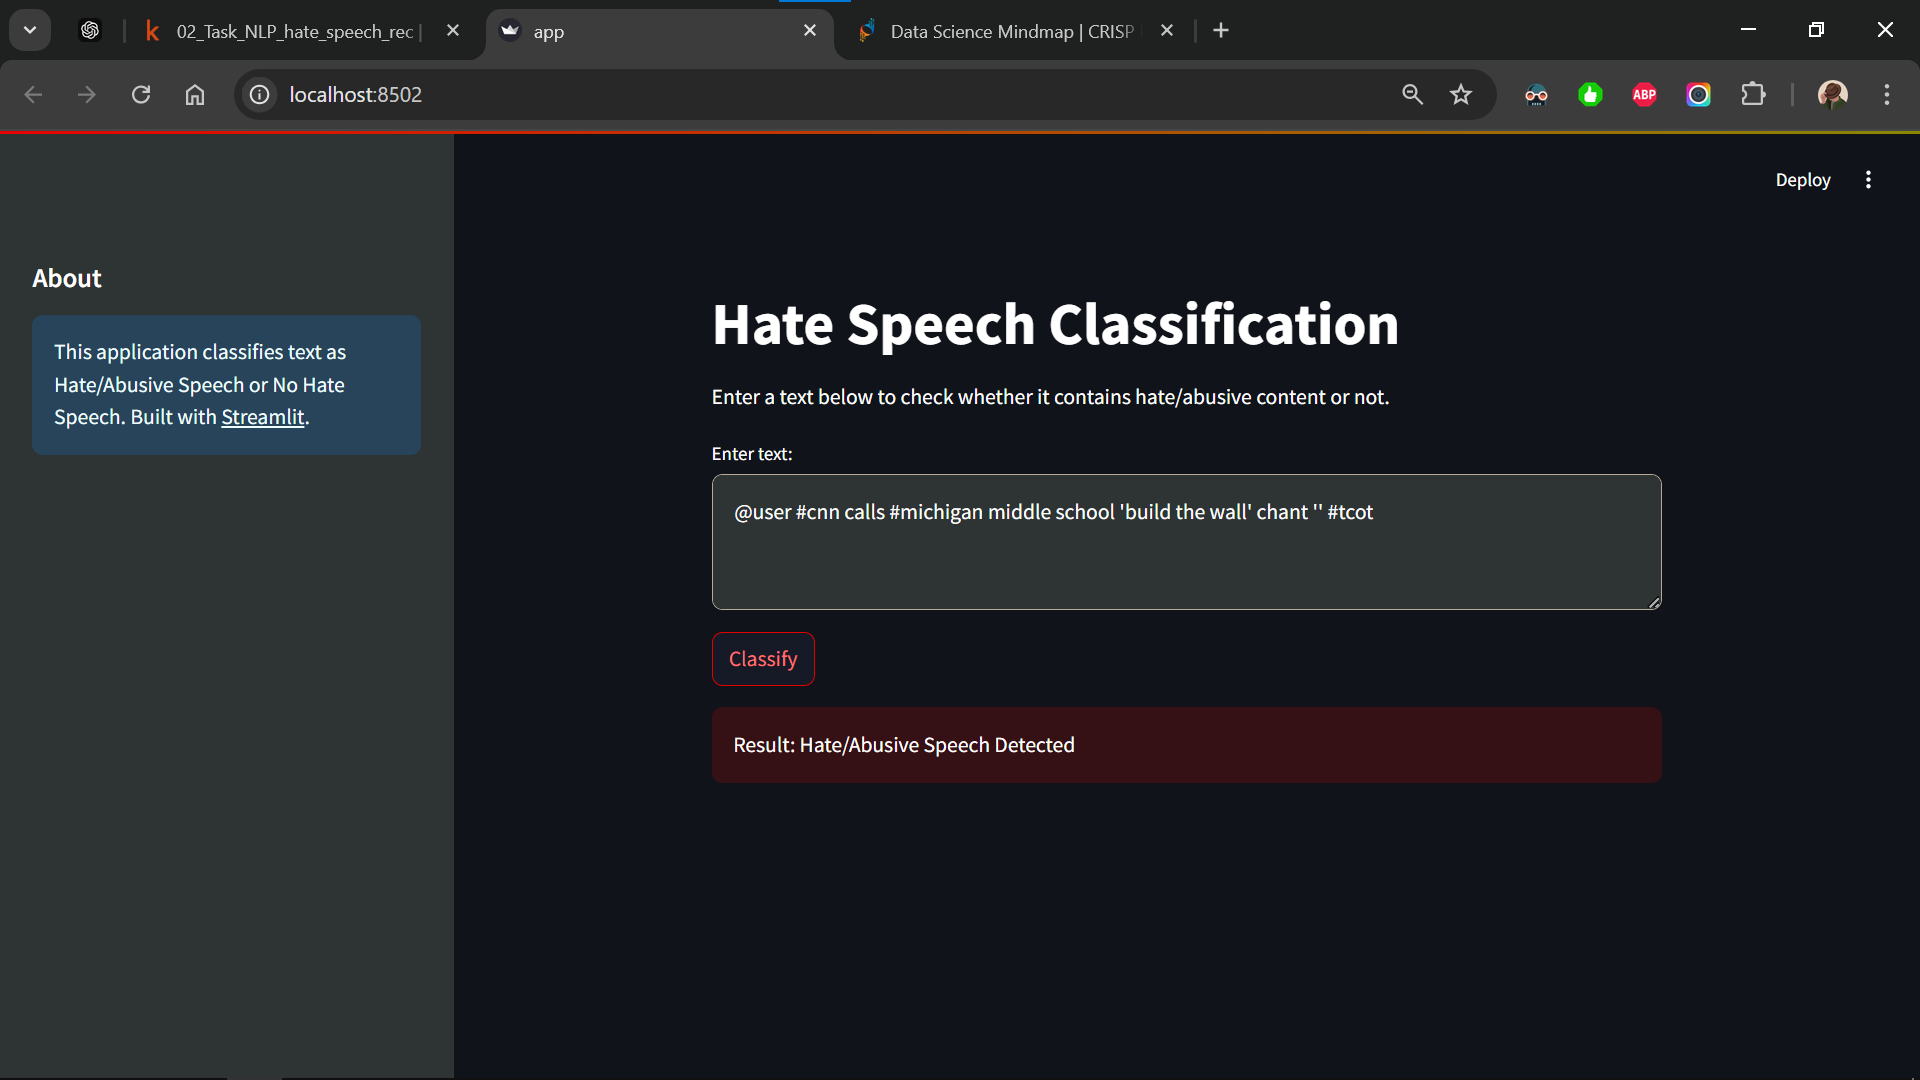

## importing all required lib and dataset


In [9]:
import pandas as pd
import seaborn as sns

In [10]:
imbalance_data = pd.read_csv(r"/kaggle/input/hate-speech-reco/imbalanced_data.csv")     # loading dataset
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
imbalance_data.info()
# imbalance_data.shape
# imbalance_data.isnull().sum()   # we can see that there no na/missing value available in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
imbalance_data.drop("id", axis=1, inplace=True)

In [13]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

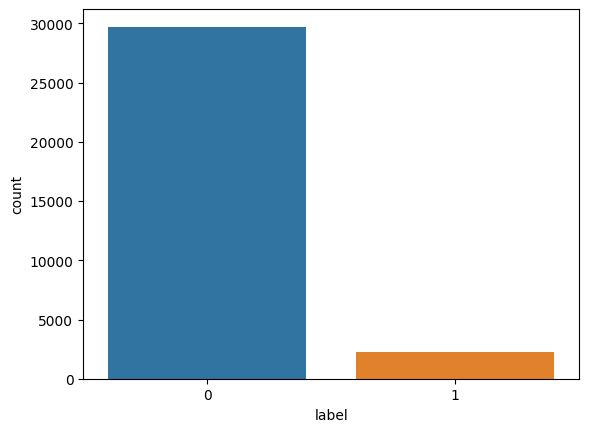

In [14]:
sns.countplot(x='label', data=imbalance_data)

In [15]:
################## loading raw dataset
raw_data = pd.read_csv(r"/kaggle/input/hate-speech-reco/raw_data.csv")   # reading second dataset
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [16]:
raw_data.info()
# imbalance_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [17]:
raw_data.isnull().sum()  # here there is no null value in dataset

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [18]:
# drop the columns which are not required for us.
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [19]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

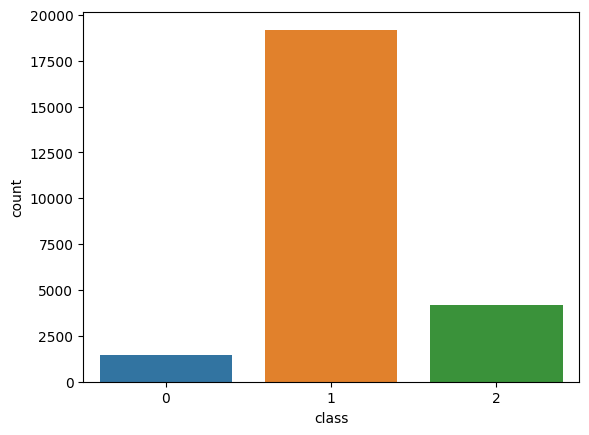

In [20]:
sns.countplot(x='class',data =raw_data)

In [21]:
raw_data['class'].unique()  # check for the unique values in the dataset

array([2, 1, 0])

In [22]:
#copying the valus of the class 1 into class 0.
raw_data[raw_data['class']==0]['class']=1

/tmp/ipykernel_30/1388947875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [23]:
# check the values in the claass 0
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [24]:
# replace the value of 0 to 1
raw_data["class"].replace({0:1},inplace=True)
raw_data["class"].unique()

/tmp/ipykernel_30/2472025450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({0:1},inplace=True)


array([2, 1])

<Axes: xlabel='class', ylabel='count'>

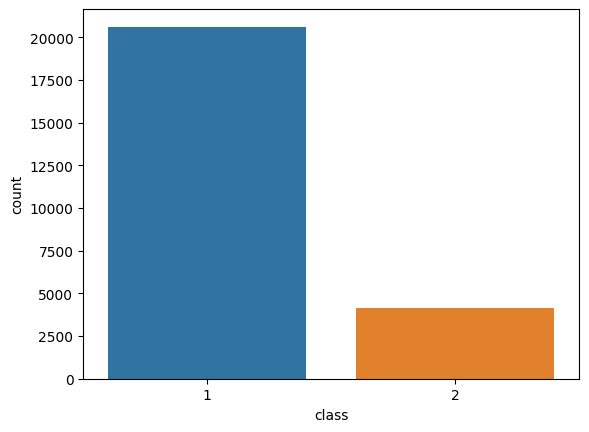

In [25]:
sns.countplot(x="class",data= raw_data)

In [26]:
# replacing the value of 2 to 0.
raw_data["class"].replace({2:0}, inplace = True)

/tmp/ipykernel_30/3910026964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({2:0}, inplace = True)


<Axes: xlabel='class', ylabel='count'>

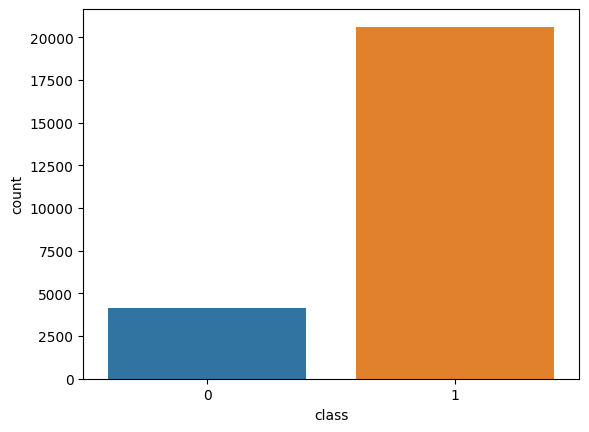

In [27]:
sns.countplot(x='class',data=raw_data)

In [28]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [29]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [30]:
# change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
################################## concatinate both the data into a single data frame.
frame = [imbalance_data, raw_data]
df = pd.concat(frame)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56745 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


<Axes: xlabel='label', ylabel='count'>

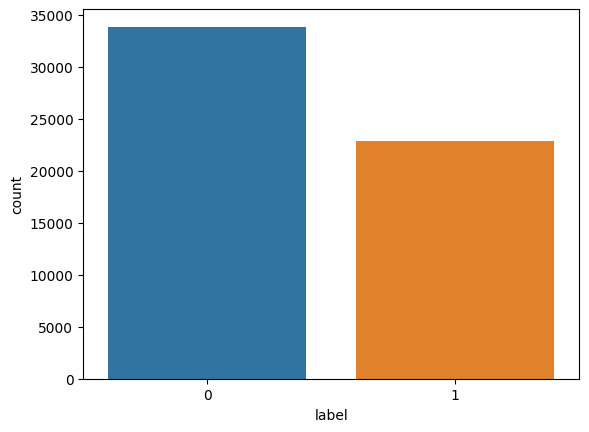

In [32]:
sns.countplot(x='label',data=df)

# Data preprocessing

In [33]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
# apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# defining function for to clean dataset
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)
    return words

df["tweet"][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [35]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)
df["tweet"][1]

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

## extracting independent and dependent var

In [36]:
x = df['tweet']
y = df['label']

## splitting the dataset into train and test

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42558,), (14187,), (42558,), (14187,))

## feature engineering

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)  # Limits the vocabulary size to the max_words most frequent words in the training data. Words outside this range will be ignored.
tokenizer.fit_on_texts(x_train)    #Analyzes the texts in x_train (training data) to create:
# A word index (mapping each word to a unique integer based on frequency)
sequences = tokenizer.texts_to_sequences(x_train) #Converts each text in x_train into a sequence of integers. Each word is replaced by its corresponding index from the tokenizer’s vocabulary.
sequences_matrix = pad_sequences(sequences,maxlen=max_len) #Ensures that all sequences are the same length (max_len)
sequences_matrix

array([[    0,     0,     0, ...,   209, 13070,  4452],
       [    0,     0,     0, ...,   248,     3,   653],
       [    0,     0,     0, ...,     1,  1831, 41012],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33462],
       [    0,     0,     0, ...,   954, 14416,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

## model building

In [42]:
# Importing necessary libraries and modules from Keras
from keras.models import Sequential  # For creating a linear stack of layers
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D  # Various layers for our model
from keras.optimizers import RMSprop  # Optimizer to adjust model weights

In [43]:
# Step 1: Initialize the model
# We will use a Sequential model, which means we'll stack the layers one by one in a sequence.
model = Sequential()

# Step 2: Add an Embedding Layer
# Converts words (represented as numbers) into dense vectors of fixed size.
# max_words: Total unique words (vocabulary size).
# 100: Size of each word vector (embedding size).
# input_length: Length of each input sequence (number of words in each text).
model.add(Embedding(max_words, 100, input_length=max_len))

# Step 3: Add a SpatialDropout1D Layer
# Randomly ignores some parts of the embedding layer's output to prevent overfitting.
# - 0.2: 20% of the connections will be "dropped" (ignored) during training.
model.add(SpatialDropout1D(0.2))

# Step 4: Add an LSTM Layer
# LSTM (Long Short-Term Memory) is a special type of neural network layer that can remember information over time.
# 100: Number of "memory units" in the LSTM layer (more units mean the model can learn more complex patterns).
# dropout: Randomly ignores 20% of the layer's connections for regularization.
# recurrent_dropout: Applies 20% dropout specifically to the memory connections within the LSTM.
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Step 5: Add a Dense Layer
# A Dense (fully connected) layer is added as the output layer.
# - 1: Output size (1 because this is binary classification).
# - activation='sigmoid': Ensures the output is between 0 and 1, which is perfect for binary classification.
model.add(Dense(1, activation='sigmoid'))

# Step 6: Display the Model Summary
# Shows the architecture of the model, including the layers, their output shapes, and the number of parameters.
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Step 7: Compile the Model
# We need to specify:
# Loss function: Measures the difference between predicted and actual outputs. ('binary_crossentropy' for binary classification tasks)
# Optimizer: RMSprop adjusts the model weights to reduce the loss during training.
# Metrics: Tracks the model's performance (e.g., 'accuracy').
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Step 8: Train the Model
# Fit the model to the training data. This is where the model learns from examples.
# sequences_matrix: Input training data (preprocessed text sequences).
# y_train: Corresponding labels (0 or 1 for each input).
# batch_size: Number of samples the model looks at in one go (128 examples at a time).
# epochs: Number of times the model sees the entire dataset (5 complete passes).
# validation_split: 20% of the training data will be used to check the model's performance during training.
history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 125s 450ms/step - accuracy: 0.8287 - loss: 0.3833 - val_accuracy: 0.9313 - val_loss: 0.1906
Epoch 2/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 119s 447ms/step - accuracy: 0.9469 - loss: 0.1612 - val_accuracy: 0.9393 - val_loss: 0.1759
Epoch 3/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 119s 447ms/step - accuracy: 0.9569 - loss: 0.1322 - val_accuracy: 0.9415 - val_loss: 0.1628
Epoch 4/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 118s 444ms/step - accuracy: 0.9676 - loss: 0.1075 - val_accuracy: 0.9382 - val_loss: 0.1910
Epoch 5/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 117s 441ms/step - accuracy: 0.9704 - loss: 0.0972 - val_accuracy: 0.9398 - val_loss: 0.1765
Epoch 6/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 118s 442ms/step - accuracy: 0.9742 - loss: 0.0844 - val_accuracy: 0.9404 - val_loss: 0.1722
Epoch 7/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 118s 443ms/step - accuracy: 0.9782 - loss: 0.0746 - val_accuracy: 0.9368 - val_loss: 0.2007
Epoch 8/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 119s 448ms/step - accuracy: 0.9812 -

In [45]:
# Step 1: Convert Test Data into Sequences
# The tokenizer converts each text in the test dataset into a sequence of numbers (word indices).
# Each word in the text is replaced by its corresponding index in the tokenizer's vocabulary.
# - x_test: Test dataset containing text samples.
test_sequences = tokenizer.texts_to_sequences(x_test)

# Step 2: Pad Sequences to Ensure Uniform Length
# Since the model expects all input sequences to have the same length (max_len), we pad the sequences.
# - Shorter sequences are padded with zeros at the beginning to make them equal to max_len.
# - Longer sequences are truncated to fit max_len.
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix

array([[   29,  1856,  1260, ...,    13,    11,    29],
       [  471,   192,    31, ...,    16,     3, 17681],
       [    0,     0,     0, ...,   261,   331,  1505],
       ...,
       [    0,     0,     0, ...,    62,    10,   456],
       [    0,     0,     0, ...,     2,     4,     4],
       [    0,     0,     0, ...,     8,    88,  3776]], dtype=int32)

In [46]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)
accr

444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.9315 - loss: 0.2938


[0.2972456216812134, 0.9311341643333435]

In [47]:
lstm_prediction = model.predict(test_sequences_matrix)
lstm_prediction

444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step


array([[0.9986659 ],
       [0.00729575],
       [0.9984541 ],
       ...,
       [0.999027  ],
       [0.00196953],
       [0.00872928]], dtype=float32)

In [48]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[8000  453]
 [ 524 5210]]


## saving model and tokens in pickle and .h5 formate for further use

In [64]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


# Save the model
model.save("model.h5")  # No need to specify `custom_objects` while saving

from keras.models import load_model
# Load the model
model = load_model("model.h5")

# test our model on custom data.

In [53]:
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [54]:
test=[clean_text(test)]
print(test)

i love this movie
i love this movie
['love movi']


In [55]:
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

[[28, 5904]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
pred [[0.12849921]]
no hate


# application Deploying model using the Streamlit 
    1. Ensure Streamlit Installation
    2. Create the Streamlit Script
    3. Install pyngrok to Expose the App
    4. Run the Streamlit App with Ngrok

### 1. Create the Streamlit Script


In [65]:
!echo 'our streamlit code here' > app.py     #Save your Streamlit application code in a .py file 

### 2. Install pyngrok to Expose the App


In [58]:
!pip install pyngrok  # Installing pyngrok to create a tunnel for accessing our Streamlit app from outside Kaggle

### 3. Run the Streamlit App with Ngrok

In [66]:
from pyngrok import ngrok
import os

# Start Streamlit app
os.system("streamlit run app.py &")

# Create ngrok tunnel
public_url = ngrok.connect(8501)
print(f"Access your app at {public_url}")


ERROR:  authentication failed: Usage of ngrok requires a verified account and authtoken.
ERROR:  
ERROR:  Sign up for an account: https://dashboard.ngrok.com/signup
ERROR:  Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken
ERROR:  
ERROR:  ERR_NGROK_4018
ERROR:  https://ngrok.com/docs/errors/err_ngrok_4018
ERROR:  


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.19.2.2:8502
  External URL: http://34.67.207.208:8502



In [59]:
import streamlit as st
import re
import pickle
from keras.models import load_model
from keras.utils import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# Download nltk stopwords
nltk.download('stopwords')

# Load pre-trained model and tokenizer
model = load_model("/kaggle/working/model.h5")
with open('/kaggle/working/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define stopwords and stemmer
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[{}]'.format(re.escape(r'!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~')), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join([stemmer.stem(word) for word in text])
    return text

# Streamlit app
st.title("Hate Speech Classification")
st.write("Enter a text below to check whether it contains hate/abusive content or not.")

# Input from user
user_input = st.text_area("Enter text:", placeholder="Type your message here...")

# Button to predict
if st.button("Classify"):
    if user_input.strip() != "":
        # Clean and preprocess user input
        cleaned_input = clean_text(user_input)
        seq = tokenizer.texts_to_sequences([cleaned_input])
        padded = pad_sequences(seq, maxlen=300)

        # Predict
        prediction = model.predict(padded)[0][0]

        # Display result
        if prediction < 0.5:
            st.success("Result: No Hate Speech Detected")
        else:
            st.error("Result: Hate/Abusive Speech Detected")
    else:
        st.warning("Please enter some text to classify.")

# Footer
st.sidebar.header("About")
st.sidebar.info(
    """
    This application classifies text as Hate/Abusive Speech or No Hate Speech.
    Built with [Streamlit](https://streamlit.io/).
    """
)


2024-11-28 09:35:24.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 09:35:24.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [61]:
import os
print(os.path.exists("model.h5"))  

True


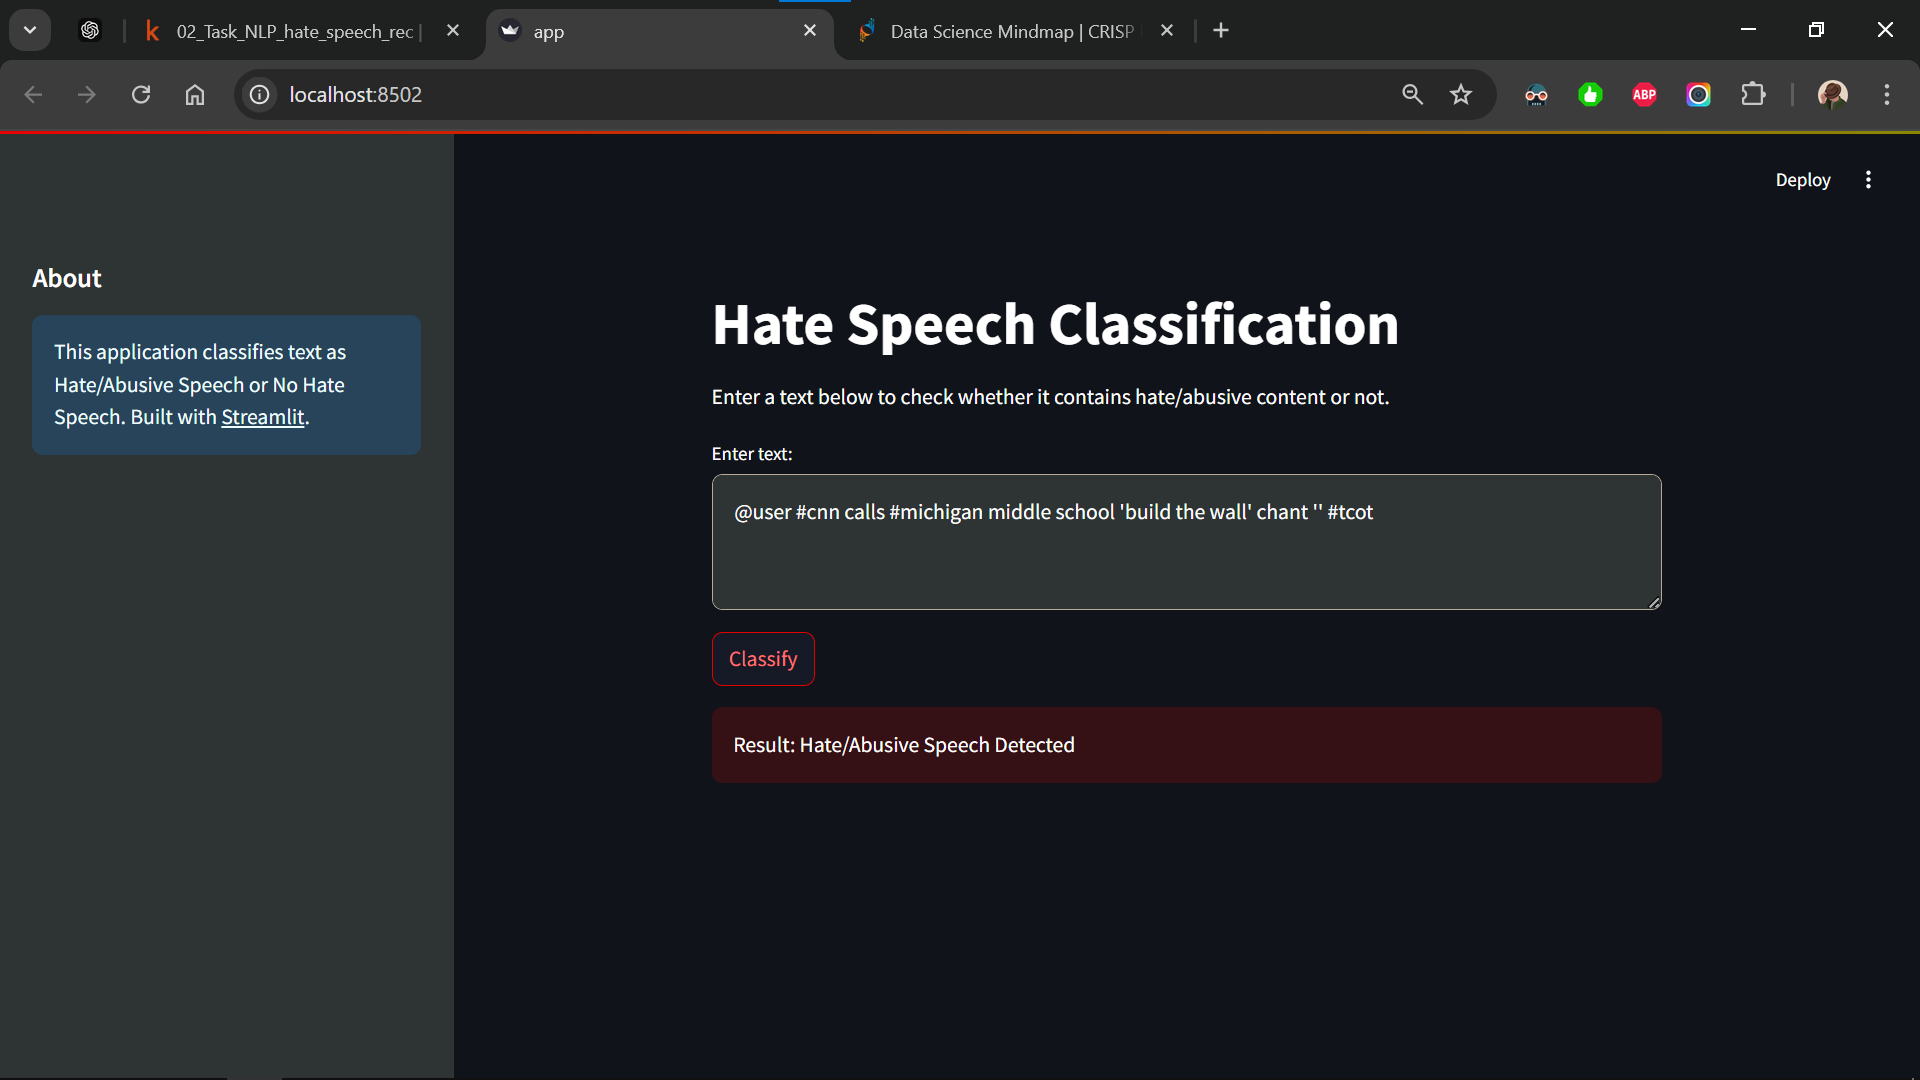